In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from pathlib import Path

In [ ]:
from IPython import display

In [ ]:
mario = Path('img/mario.png')
coin = Path('img/coin.png')

In [ ]:
empty_board = Path('img/template.png')
board = Path('data/_board/alpha.png')

In [ ]:
def match_files(template: Path, image: Path) -> np.ndarray:
    return match_template(cv.imread(template.as_posix(), 0),
                    cv.imread(image.as_posix()))

In [ ]:
def match_template(template: np.ndarray, img: np.ndarray) -> np.ndarray:
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    w, h = template.shape[::-1]
    res = cv.matchTemplate(img_gray, template, cv.TM_CCOEFF_NORMED)
    threshold = 0.8
    loc = np.where( res >= threshold)
    new_img = np.copy(img)
    for pt in zip(*loc[::-1]):
        cv.rectangle(new_img, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)
    return new_img

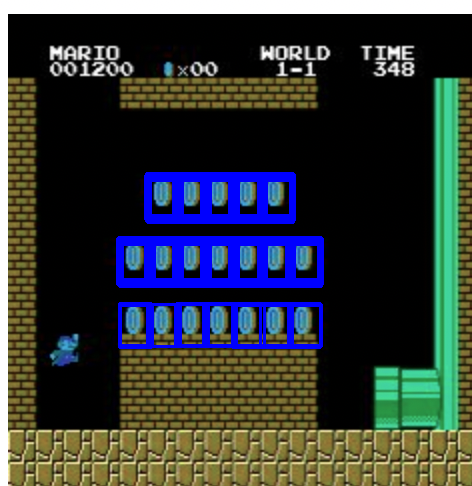

In [ ]:
new = match_files(coin, mario)
Image.fromarray(new)